# 3.6 Lab: Linear Regression (Sections 3.6.4-3.6.6)

### In Python, module can be imported by a command similar to 'import numpy as np'. It is a good practice to maintain a section at the beginning of the notebook to import all necessary modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model

### Since in Python, there is no default MASS module and Boston dataset, I will read in the Boston dataset from CSV.

In [2]:
Boston = pd.read_csv('data/Boston.csv', header=0) # the first line of data is header

In [3]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
Boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [5]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
Boston.shape

(506, 14)

## 3.6.4 Interaction Terms

In [7]:
lm = smf.ols('medv~lstat+age+lstat:age', data=Boston).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 29 Aug 2018   Prob (F-statistic):           4.86e-88
Time:                        15:21:04   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

In [8]:
lm = smf.ols('medv~lstat * age', data=Boston).fit()  # short notation for 'medv~lstat+age+lstat:age'
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 29 Aug 2018   Prob (F-statistic):           4.86e-88
Time:                        15:22:00   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

## 3.6.5 Non-linear Transformations of the Predictors 

In [9]:
lm_order1 = smf.ols('medv~ lstat', data=Boston).fit()
print (lm_order1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 29 Aug 2018   Prob (F-statistic):           5.08e-88
Time:                        15:23:06   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [10]:
lm_order2 = smf.ols('medv~ lstat+ I(lstat ** 2.0)', data=Boston).fit() # Note that R-squared value is improved.
print (lm_order2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Wed, 29 Aug 2018   Prob (F-statistic):          1.56e-112
Time:                        15:24:09   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          42.8620      0.872     

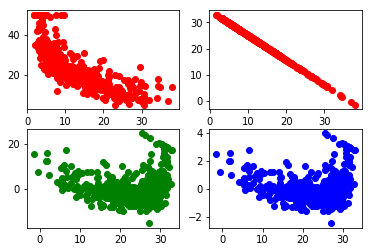

In [12]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2)
ax1.plot(Boston.lstat, Boston.medv,'ro')
ax2.plot(Boston.lstat, lm_order1.predict(),'ro')
ax3.plot(lm_order1.predict(), lm_order1.resid, 'go')
ax4.plot(lm_order1.predict(), lm_order1.resid_pearson, 'bo')  # normalized residual values (normalized to have unit variance)
plt.show()

### if we added in the second order, we can see the residues are more random

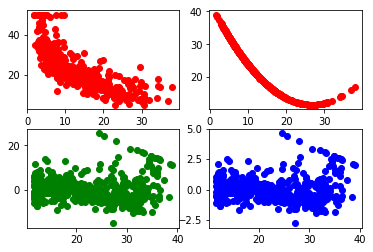

In [14]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2)
ax1.plot(Boston.lstat, Boston.medv,'ro')
ax2.plot(Boston.lstat,  lm_order2.predict(),'ro')
#ax2.plot(Boston.lstat ** 2.0,  lm_order2.predict(),'ro')
ax3.plot(lm_order2.predict(), lm_order2.resid, 'go')
ax4.plot(lm_order2.predict(), lm_order2.resid_pearson, 'bo')
plt.show()

### There is anova function built in already in statsmodels.  If you know what to do, use the key words to google it and likely you will find a very good answer. Here we compare the models with one order of stat and two orders of stats. By looking at the p value that will reject the null hypothesis that the coefficent of lstat**2 equals 0.

In [16]:
import statsmodels.api as sm
table = sm.stats.anova_lm(lm_order1, lm_order2)
print (table)

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


D:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [18]:
lm_order3 = smf.ols('medv~ lstat + I(lstat ** 2.0) + I(lstat ** 3.0)', data=Boston).fit()
print (lm_order3.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     321.7
Date:                Wed, 29 Aug 2018   Prob (F-statistic):          1.78e-116
Time:                        15:48:17   Log-Likelihood:                -1568.9
No. Observations:                 506   AIC:                             3146.
Df Residuals:                     502   BIC:                             3163.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          48.6496      1.435     

In [20]:
lm_rm = smf.ols('medv~ rm', data=Boston).fit()
print(lm_rm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 29 Aug 2018   Prob (F-statistic):           2.49e-74
Time:                        15:49:59   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

In [21]:
lm_rm_log = smf.ols('medv~ np.log(rm)', data=Boston).fit() # use a log transformation
print(lm_rm_log.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Wed, 29 Aug 2018   Prob (F-statistic):           1.22e-64
Time:                        15:50:28   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.0

## 3.6.6 Qualitative Predictors 

### Let us load the Carseats file in and explore this dataset.

In [22]:
Carseats = pd.read_csv('data/Carseats.csv', header=0)

In [23]:
list(Carseats)

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [24]:
Carseats.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [25]:
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [26]:
lm_carseats = smf.ols('Sales ~ Income + Advertising + Price + Age', data = Carseats).fit()

In [27]:
print(lm_carseats.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     58.21
Date:                Wed, 29 Aug 2018   Prob (F-statistic):           1.33e-38
Time:                        15:56:24   Log-Likelihood:                -889.67
No. Observations:                 400   AIC:                             1789.
Df Residuals:                     395   BIC:                             1809.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      15.1829      0.777     19.542      

### let us create dummy variables using get_dummies, then exclude the first dummy column

In [28]:
ShelveLoc_dummies = pd.get_dummies(Carseats.ShelveLoc, prefix='ShelveLoc')
print(ShelveLoc_dummies)

     ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium
0                1               0                 0
1                0               1                 0
2                0               0                 1
3                0               0                 1
4                1               0                 0
5                1               0                 0
6                0               0                 1
7                0               1                 0
8                0               0                 1
9                0               0                 1
10               1               0                 0
11               0               1                 0
12               0               0                 1
13               0               1                 0
14               0               1                 0
15               0               0                 1
16               0               1                 0
17               0               1            

In [29]:
ShelveLoc_dummies = pd.get_dummies(Carseats.ShelveLoc, prefix='ShelveLoc').iloc[:,1:]
print(ShelveLoc_dummies)

     ShelveLoc_Good  ShelveLoc_Medium
0                 0                 0
1                 1                 0
2                 0                 1
3                 0                 1
4                 0                 0
5                 0                 0
6                 0                 1
7                 1                 0
8                 0                 1
9                 0                 1
10                0                 0
11                1                 0
12                0                 1
13                1                 0
14                1                 0
15                0                 1
16                1                 0
17                1                 0
18                1                 0
19                0                 1
20                0                 1
21                1                 0
22                0                 1
23                0                 1
24                0                 0
25          

In [30]:
Carseats_dummy = pd.concat([Carseats, ShelveLoc_dummies], axis=1)  # axis=1 means merging the two column.
Carseats_dummy.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,0,0
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1,0
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,0,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0,0


### Then the model buliding will be the same with all numerrical variables.

In [31]:
lm_carseats_dummy = smf.ols('Sales ~ Income + Advertising + Price + Age + ShelveLoc_Good + ShelveLoc_Medium', 
                            data = Carseats_dummy).fit()

In [32]:
print(lm_carseats_dummy.summary())
# The interpretation of the coefficients are holding everything fixed, Medium shelve location is associated 
# with an average increase of sale around 2.0046. 
# R-squared value is improved.

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     158.3
Date:                Wed, 29 Aug 2018   Prob (F-statistic):          1.33e-101
Time:                        16:04:13   Log-Likelihood:                -736.58
No. Observations:                 400   AIC:                             1487.
Df Residuals:                     393   BIC:                             1515.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.4006      0.545  

### statsmodels has the built-in support for categorical variables, just add C() to indicate that the variable will be categorical. 

In [33]:
lm_carseats_wo_dummy = smf.ols('Sales ~ Income + Advertising + Price + Age + C(ShelveLoc)', 
                            data = Carseats).fit()

In [34]:
print(lm_carseats_wo_dummy.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     158.3
Date:                Wed, 29 Aug 2018   Prob (F-statistic):          1.33e-101
Time:                        16:04:53   Log-Likelihood:                -736.58
No. Observations:                 400   AIC:                             1487.
Df Residuals:                     393   BIC:                             1515.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 13

### Compapre the summary of above two models, one with explicit encoding of dummy varible, while the other used the built-in function.